In [2]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 17.2 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 MB 13.0 MB/s eta 0:00:00m eta 0:00:010:00:01


/home/gopi/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:42:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       150
           1       0.94      0.90      0.92       146

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296

Confusion Matrix:
 [[142   8]
 [ 14 132]]


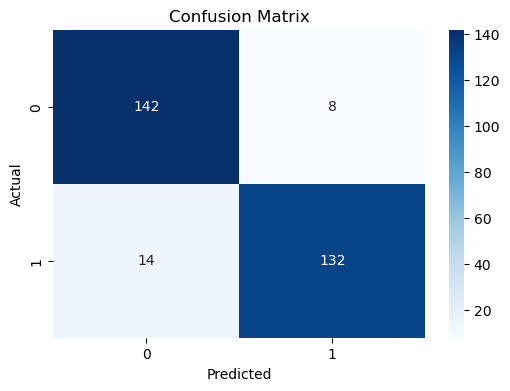

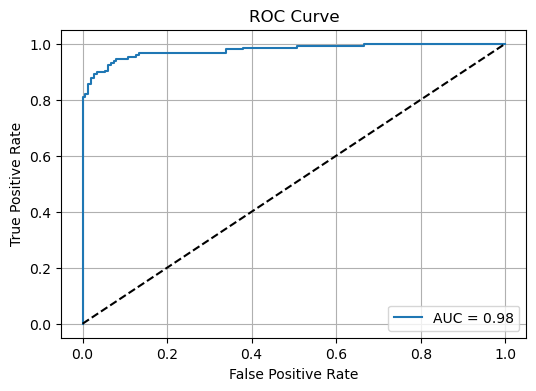

['xgboost_model.pkl']

In [1]:
# fraud_detection.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
import joblib
import seaborn as sns

# Load dataset
df = pd.read_csv("creditcard.csv")

# Normalize Amount
scaler = StandardScaler()
df['normAmount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# Drop Time and Amount
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# Define features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Handle class imbalance with undersampling
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Train XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_score = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()
# Save model
joblib.dump(model, "xgboost_model.pkl")
